# Numerical methods project : analysis of the Sweby scheme

Cyril Maquin, Yann Simon

## General context

We want to solve partial differential equations of the form
$$ \partial_t u + A \partial_x u = 0 $$
which can be rewritten as
$$\partial_t u + \partial_x f(u) = 0$$
for $u(x,t)$, where $f$ is the flux fonction associated to $u$. The discretization of this equation leads to 
$$w_{j}^{n+1} = w_j^n + \nu \left(F_{j+1/2}^n - F_{j-1/2}^n\right)$$
where $w$ is the discretized equivalent of $u$, $F$ is the numerical flux and $\nu = \frac{\Delta t}{\Delta x}$.
$A$ is a constant for linear equations. In the non-linear case, it can be estimated as 
$$A_{j+1/2} = \begin{cases} \frac{f(w_{j+1}^n) - f(w_j^n)}{w_{j+1}^n - w_j^n} & \text{if } w_{j+1}^n \neq w_j^n \\ f'(w_j^n) & \text{else} \end{cases}.$$

## The Sweby flux limiter scheme

The Sweby flux limiter scheme consists in approximating the numerical flux $F_{j+1/2}^n$ with the following method : 
$$ F_{j+1/2}^n = F_{j+1/2}^{\text{Roe}} + \phi_j^n\left(F_{j+1/2}^\text{Lax-Wendroff} - F_{j+1/2}^\text{Roe}\right),$$
with 
$$F_{j+1/2}^{\text{Roe}} = \frac{1}{2}\left(f(w_j^n)+f(w_{j+1}^n)\right) - \frac{|A|}{2}\left(w_{j+1}^n - w_j^n\right)$$
and
$$F_{j+1/2}^\text{Lax-Wendroff} = \frac{1}{2}\left(f(w_{j+1}^n + f(w_j^n)\right) - \frac{A^2\nu}{2}\left(w_{j+1}^n - w_j^n\right).$$
$\phi_j^n$ is called the flux limiter and can be estimated by several methods. We first have to define the parameter $r$ :
$$r_j = \begin{cases} \frac{w_j^n - w_{j-1}^n}{w_{j+1}^n - w_j^n} & \text{if } A_{j+1/2} > 0 \\ \frac{w_{j+1}^n - w_{j}^n}{w_{j}^n - w_{j-1}^n} & \text{if } A_{j+1/2} < 0 \end{cases}.$$
Then, we can define $\phi$ as for instance : 

$$\text{Minmod : } \phi = \max{0, \min(1,r)}$$
$$\text{Van Leer : } \phi = \frac{r + |r|}{1 + |r|}$$
$$\text{Superbee : } \phi = \max(0, \min(2r,1), \min(r,2))$$
$$\text{MC : } \phi = \max\left(0, \min\left(\frac{1+r}{2},2,2r\right)\right)$$
$$\text{Van Albada : } \phi = \max\left(0,\frac{r^2 + r}{1 + r^2}\right)$$
$$\text{Chakravarthy-Osher : } \phi = \max\left(0, \min\left(\beta,r \right)\right),$$
with $\beta \in [1,2]$.

In this project, we implemented this scheme and tested it on five test cases.

### Imports

In [31]:
# Import necessary libraries for numerical computation and visualization
import numpy as np                                    # Numerical arrays and mathematical functions
import matplotlib.pyplot as plt                       # Plotting and visualization
import test_suite as ts                               # Test cases for hyperbolic conservation laws
import misc as mi                                     # Miscellaneous utility functions (ghost cells, boundary conditions)
import SwebySchemeTemplate as sweby                   # Sweby flux-limited scheme implementation

### Limiter selection

In [32]:
limiter = 'minmod'  # Options: 'superbee', 'minmod', 'van_leer', 'mc', 'van_albada','chak_&_osher'

## First test case

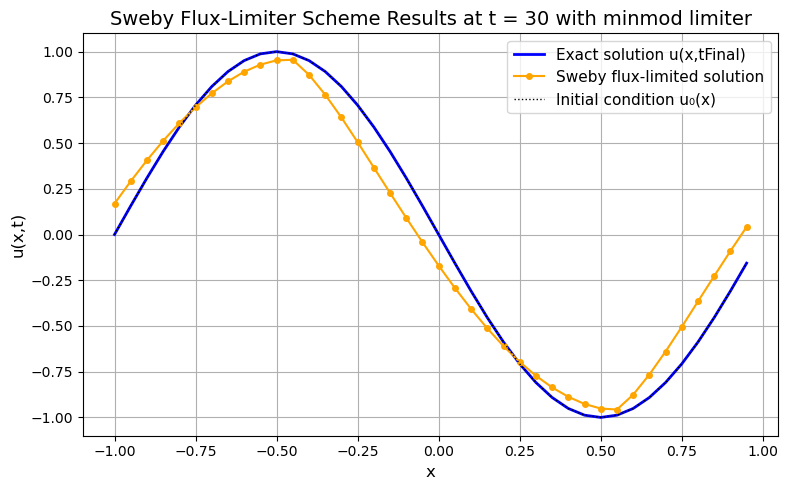

In [33]:
#Test selection
tst = ts.Test1()

#Scheme running
scheme = sweby.Sweby1(tst, form='sweby', limiter=limiter)
scheme.compute(scheme.tFinal)

#Results plotting
# Create comparison plot of solutions
plt.figure(figsize=(8, 5))

# Blue line: Exact solution at final time (if available)
if hasattr(scheme, 'uFinal') and scheme.uFinal is not None:
    plt.plot(scheme.x, scheme.uFinal, 'b-', linewidth=2, label='Exact solution u(x,tFinal)')

# Orange circles: Numerical solution from Sweby scheme
plt.plot(scheme.x, scheme.uF, 'o', color='orange', markersize=4, 
         linestyle="solid", label='Sweby flux-limited solution')

# Dotted line: Initial condition for reference
plt.plot(scheme.x, scheme.u0(scheme.x), 'k:', linewidth=1, label='Initial condition u₀(x)')

# Add plot formatting
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,t)', fontsize=12)
plt.title(f'Sweby Flux-Limiter Scheme Results at t = {scheme.tFinal} with {scheme.limiter} limiter', fontsize=14)
plt.legend(fontsize=11)
plt.grid()


plt.tight_layout()
plt.show()

## Second test case

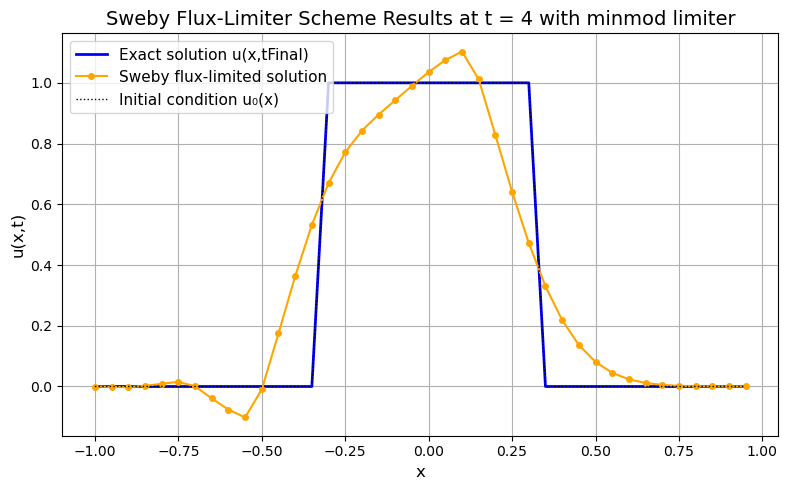

In [34]:
#Test selection
tst = ts.Test2()

#Scheme running
scheme = sweby.Sweby1(tst, form='sweby', limiter=limiter)
scheme.compute(scheme.tFinal)

#Results plotting
# Create comparison plot of solutions
plt.figure(figsize=(8, 5))

# Blue line: Exact solution at final time (if available)
if hasattr(scheme, 'uFinal') and scheme.uFinal is not None:
    plt.plot(scheme.x, scheme.uFinal, 'b-', linewidth=2, label='Exact solution u(x,tFinal)')

# Orange circles: Numerical solution from Sweby scheme
plt.plot(scheme.x, scheme.uF, 'o', color='orange', markersize=4, 
         linestyle="solid", label='Sweby flux-limited solution')

# Dotted line: Initial condition for reference
plt.plot(scheme.x, scheme.u0(scheme.x), 'k:', linewidth=1, label='Initial condition u₀(x)')

# Add plot formatting
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,t)', fontsize=12)
plt.title(f'Sweby Flux-Limiter Scheme Results at t = {scheme.tFinal} with {scheme.limiter} limiter', fontsize=14)
plt.legend(fontsize=11)
plt.grid()


plt.tight_layout()
plt.show()

## Third test case

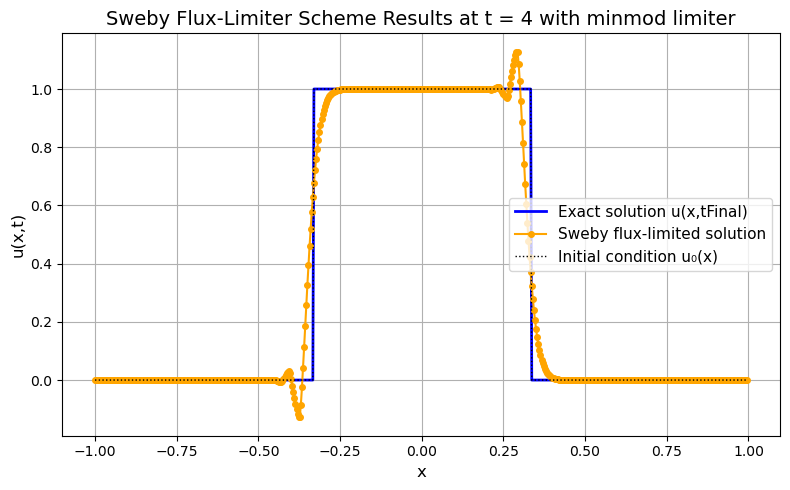

In [35]:
#Test selection
tst = ts.Test3()

#Scheme running
scheme = sweby.Sweby1(tst, form='sweby', limiter=limiter)
scheme.compute(scheme.tFinal[0])

#Results plotting
# Create comparison plot of solutions
plt.figure(figsize=(8, 5))

# Blue line: Exact solution at final time (if available)
if hasattr(scheme, 'uFinal') and scheme.uFinal is not None:
    plt.plot(scheme.x, scheme.uFinal, 'b-', linewidth=2, label='Exact solution u(x,tFinal)')

# Orange circles: Numerical solution from Sweby scheme
plt.plot(scheme.x, scheme.uF, 'o', color='orange', markersize=4, 
         linestyle="solid", label='Sweby flux-limited solution')

# Dotted line: Initial condition for reference
plt.plot(scheme.x, scheme.u0(scheme.x), 'k:', linewidth=1, label='Initial condition u₀(x)')

# Add plot formatting
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,t)', fontsize=12)
plt.title(f'Sweby Flux-Limiter Scheme Results at t = {scheme.tFinal[0]} with {scheme.limiter} limiter', fontsize=14)
plt.legend(fontsize=11)
plt.grid()


plt.tight_layout()
plt.show()

## Fourth test case

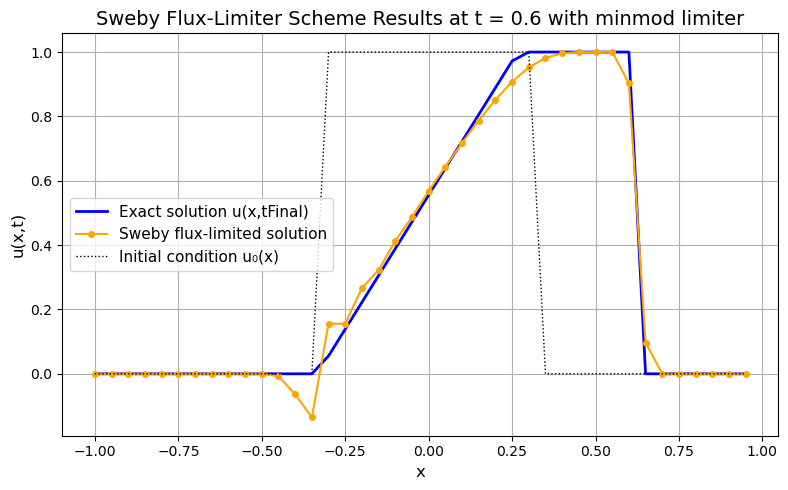

In [36]:
#Test selection
tst = ts.Test4()

#Scheme running
scheme = sweby.Sweby1(tst, form='sweby', limiter=limiter)
scheme.compute(scheme.tFinal)

#Results plotting
# Create comparison plot of solutions
plt.figure(figsize=(8, 5))

# Blue line: Exact solution at final time (if available)
if hasattr(scheme, 'uFinal') and scheme.uFinal is not None:
    plt.plot(scheme.x, scheme.uFinal, 'b-', linewidth=2, label='Exact solution u(x,tFinal)')

# Orange circles: Numerical solution from Sweby scheme
plt.plot(scheme.x, scheme.uF, 'o', color='orange', markersize=4, 
         linestyle="solid", label='Sweby flux-limited solution')

# Dotted line: Initial condition for reference
plt.plot(scheme.x, scheme.u0(scheme.x), 'k:', linewidth=1, label='Initial condition u₀(x)')

# Add plot formatting
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,t)', fontsize=12)
plt.title(f'Sweby Flux-Limiter Scheme Results at t = {scheme.tFinal} with {scheme.limiter} limiter', fontsize=14)
plt.legend(fontsize=11)
plt.grid()


plt.tight_layout()
plt.show()

## Fifth test case

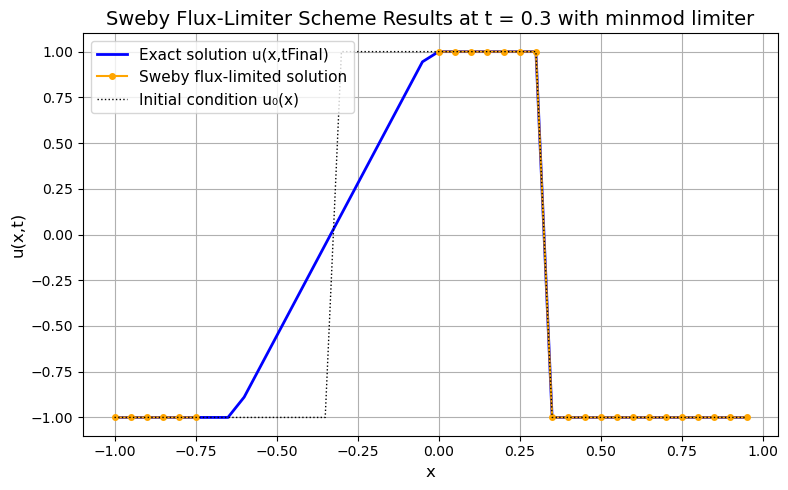

In [37]:
#Test selection
tst = ts.Test5()

#Scheme running
scheme = sweby.Sweby1(tst, form='sweby', limiter=limiter)
scheme.compute(scheme.tFinal)

#Results plotting
# Create comparison plot of solutions
plt.figure(figsize=(8, 5))

# Blue line: Exact solution at final time (if available)
if hasattr(scheme, 'uFinal') and scheme.uFinal is not None:
    plt.plot(scheme.x, scheme.uFinal, 'b-', linewidth=2, label='Exact solution u(x,tFinal)')

# Orange circles: Numerical solution from Sweby scheme
plt.plot(scheme.x, scheme.uF, 'o', color='orange', markersize=4, 
         linestyle="solid", label='Sweby flux-limited solution')

# Dotted line: Initial condition for reference
plt.plot(scheme.x, scheme.u0(scheme.x), 'k:', linewidth=1, label='Initial condition u₀(x)')

# Add plot formatting
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,t)', fontsize=12)
plt.title(f'Sweby Flux-Limiter Scheme Results at t = {scheme.tFinal} with {scheme.limiter} limiter', fontsize=14)
plt.legend(fontsize=11)
plt.grid()


plt.tight_layout()
plt.show()